Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

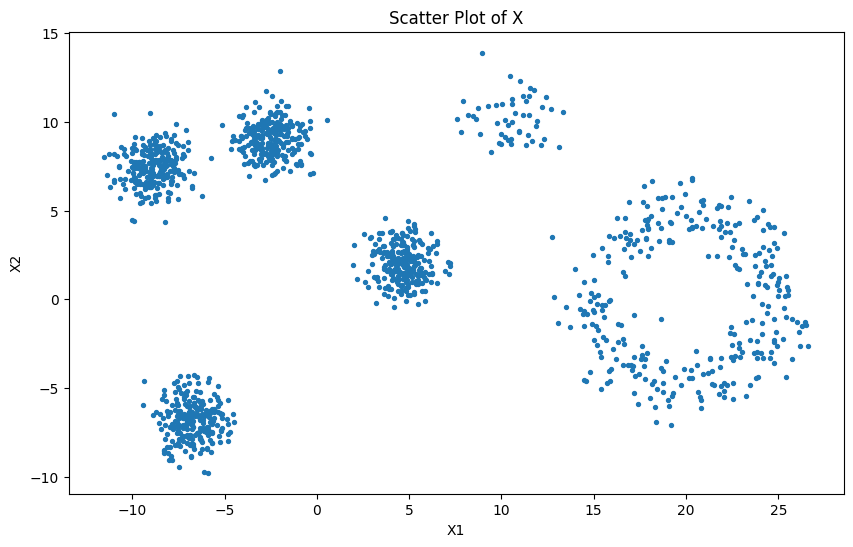

In [ ]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=8)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of X')
plt.show()


3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


# Create a KMeans object
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)

# Fit the model to the data
kmeans.fit(X)




KMeans(n_clusters=6, n_init=10, random_state=42)

4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Create a KMeans object
hierarchialClustering = AgglomerativeClustering(n_clusters=6)

# Fit the model to the data
hierarchialClustering.fit(X)


AgglomerativeClustering(n_clusters=6)

5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [ ]:
from sklearn.cluster import DBSCAN


# Create a KMeans object
DBSCANClustering = DBSCAN(eps=1.8, min_samples=20, algorithm='kd_tree')

# Fit the model to the data
DBSCANClustering.fit(X)


DBSCAN(algorithm='kd_tree', eps=1.8, min_samples=20)

6. Compare the results and choose the best method for the data


In [ ]:
print("Results:")
models ={"KMeans": kmeans, "Agglomerative Clustering": hierarchialClustering, "DBSCAN": DBSCANClustering}

max=0
winner="start"
for model_name, model in models.items():
    # Get the cluster labels for each data point
    labels = model.labels_
    unique_labels = np.unique(labels)

    silhouette_avg = silhouette_score(X, labels)
    print(f"{model_name} Silhouette Score:  {silhouette_avg:.5f}")
    if silhouette_avg>max:
        max=silhouette_avg
        winner=model_name
    elif silhouette_avg==max:
        winner=winner+" and "+model_name


print("\nI compared the models by their Silhouette Score.")
print("The winner is: " + winner + ".")


Results:
KMeans Silhouette Score:  0.72512
Agglomerative Clustering Silhouette Score:  0.72569
DBSCAN Silhouette Score:  0.71257

I compared the models by their Silhouette Score.
The winner is: Agglomerative Clustering.


Clustering results visualization.

<ipython-input-7-75f122509bfe>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[labels == label, 0], X[labels == label, 1], s=8,


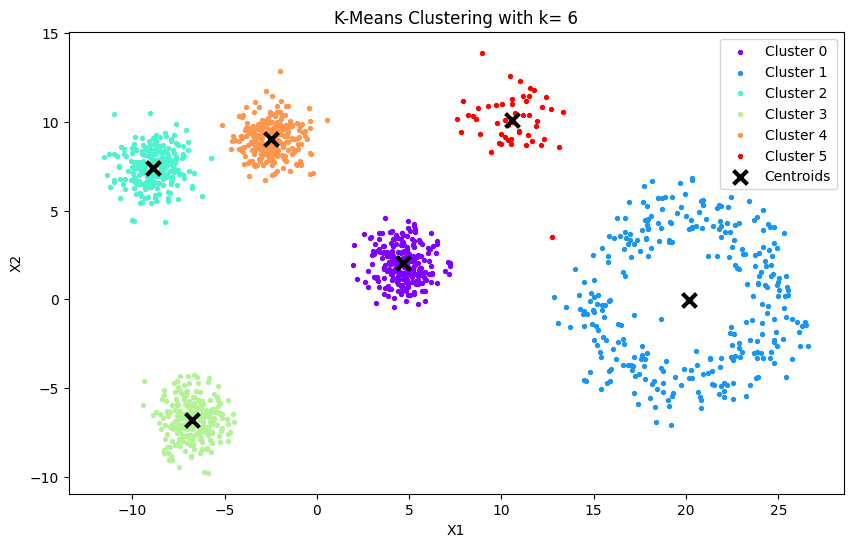

<ipython-input-7-75f122509bfe>:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[labels == label, 0], X[labels == label, 1], s=8,


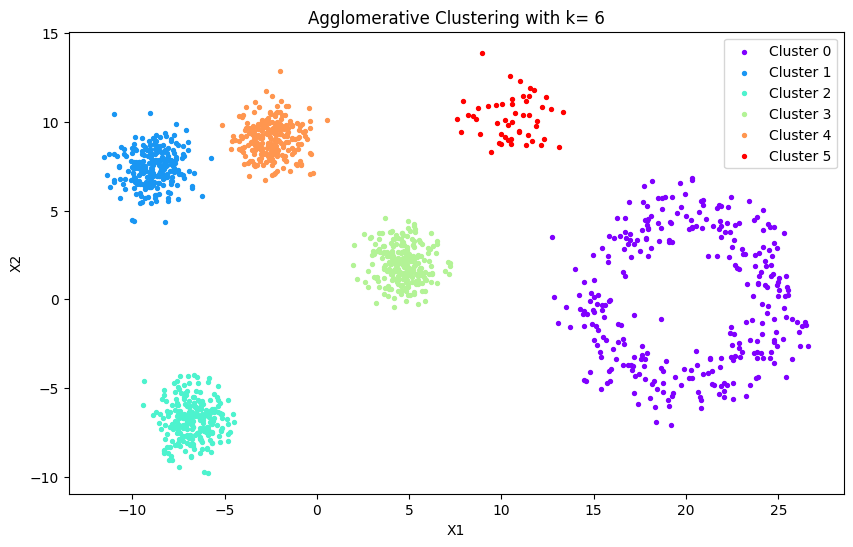

The average Silhouette score is : 0.7125671527937365


<ipython-input-7-75f122509bfe>:74: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[labels == label, 0], X[labels == label, 1], s=8,


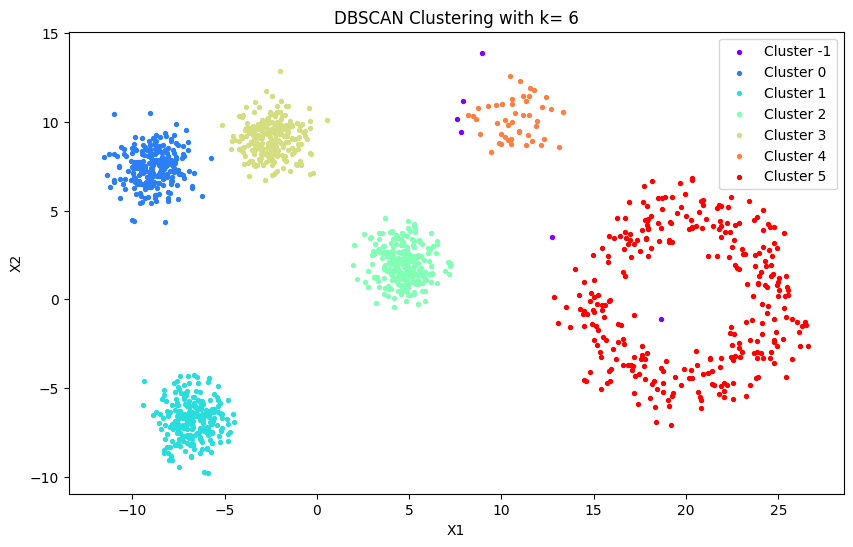

In [ ]:
# Kmeans visualization
################################
# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centers
centroids = kmeans.cluster_centers_

# Create a color map
unique_labels = np.unique(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# Plot the data points with different colors for each cluster
plt.figure(figsize=(10, 6))
for i, label in enumerate(unique_labels):
    plt.scatter(X[labels == label, 0], X[labels == label, 1], s=8,
                c=colors[i], label=f'Cluster {label}')

# Plot the cluster centers
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, linewidths=3,
            color='black', label='Centroids')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-Means Clustering with k= ' + str(len(unique_labels)))
plt.legend()
plt.show()

# Agglomerative Clustering visualization
################################

# Get the cluster labels for each data point
labels = hierarchialClustering.labels_

# Create a color map
unique_labels = np.unique(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# Plot the data points with different colors for each cluster
plt.figure(figsize=(10, 6))
for i, label in enumerate(unique_labels):
    plt.scatter(X[labels == label, 0], X[labels == label, 1], s=8,
                c=colors[i], label=f'Cluster {label}')



plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Agglomerative Clustering with k= ' + str(len(unique_labels)))
plt.legend()
plt.show()

# DBSCAN Clustering visualization
################################

# Get the cluster labels for each data point
labels = DBSCANClustering.labels_

# print the silhouette score
silhouette_avg = silhouette_score(X, labels)
print(
        "The average Silhouette score is :",
        silhouette_avg,
    )


# Create a color map
unique_labels = np.unique(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# Plot the data points with different colors for each cluster
plt.figure(figsize=(10, 6))
for i, label in enumerate(unique_labels):
    plt.scatter(X[labels == label, 0], X[labels == label, 1], s=8,
                c=colors[i], label=f'Cluster {label}')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title("DBSCAN Clustering with k= " + str(len(unique_labels)-1))
plt.legend()
plt.show()